# Solve rocket equation without drag force

In [1]:
# Import all relevant packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set parameters of packages
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{bm, amsmath, siunitx}'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['font.size'] = 10

In [2]:
# Adjustable parameters
P_0_bar = 8 # bar, rocket pressure in bars
m_w = 0.25 # kg, water mass

In [3]:
# Calculate important parameters
rho_w = 1000.0 # kg/m^3, water density
m_r = 0.04 # kg, bottle mass
g = 9.81 # m/s^2, gravitational acceleration
r = 0.0045 # m, exhaust radius
P_0 = P_0_bar*1e5 # Pa, rocket pressure in Pascals
R = 0.0325 # m, radius of bottle
A = R**2*np.pi # m^2, cross-sectional area of bottle in propagation direction
rho = 1.15 # kg/m^3, air density
tau = m_w/(r**2*np.pi*np.sqrt(P_0*rho_w)) # s, total boost time
v_w = np.sqrt(P_0/rho_w) # m/s, constant water ejection velocity
m_0 = m_r + m_w # kg, total mass of water rocket at start
b = m_w/tau # kg/s, water ejection rate
C_d = 0.57 # Air resistance coefficient
gamma = C_d*rho*A # kg/m, scaled air resistance coefficient

In [4]:
# Define height function
def h(t):
    # Define return array
    h_ret = np.zeros(len(t))
    
    # Calculation loop
    for i in range(len(t)):
        if t[i] < tau:
            h_ret[i] = v_w*(t[i]-((m_0-b*t[i])/b)*np.log(m_0/(m_0-b*t[i]))) - g*t[i]**2/2
        else:
            h_ret[i] = v_w*np.log(m_0/(m_0-b*tau))*(t[i]-tau) + v_w*(tau-((m_0-b*tau)/b)*np.log(m_0/(m_0-b*tau))) - g*t[i]**2/2
    
    # Find maximal height and time at maximal height
    h_max = np.max(h_ret)
    idx_h_max = np.argmax(h_ret)
    t_h_max = t[idx_h_max]
    h_max = round(h_max, 2)
    t_h_max = round(t_h_max, 2)
    
    # Return heights array
    return h_ret, t_h_max, h_max

In [5]:
# Define velocity function
def v(t):
    # Define return array
    v_ret = np.zeros(len(t))
    
    # Calculation loop
    for i in range(len(t)):
        if t[i] < tau:
            v_ret[i] = v_w*np.log(m_0/(m_0-b*t[i])) - g*t[i]
        else:
            v_ret[i] = v_w*np.log(m_0/(m_0-b*tau)) - g*t[i]
    
    # Find maximal velocity and time at maximal velocity
    v_max = np.max(v_ret)
    idx_v_max = np.argmax(v_ret)
    t_v_max = t[idx_v_max]
    v_max = round(v_max, 2)
    t_v_max = round(t_v_max, 4)
    
    # Return heights array
    return v_ret, t_v_max, v_max

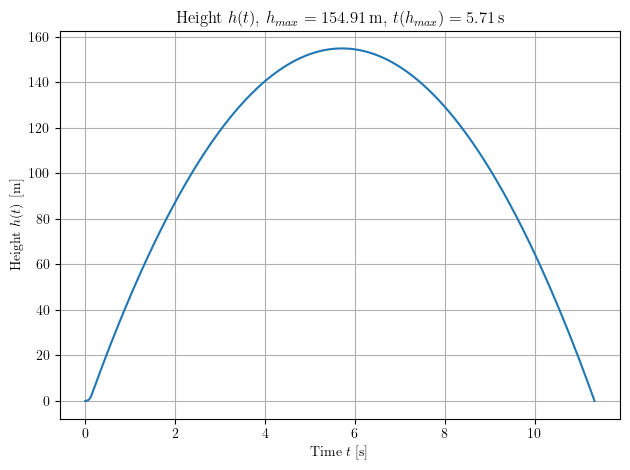

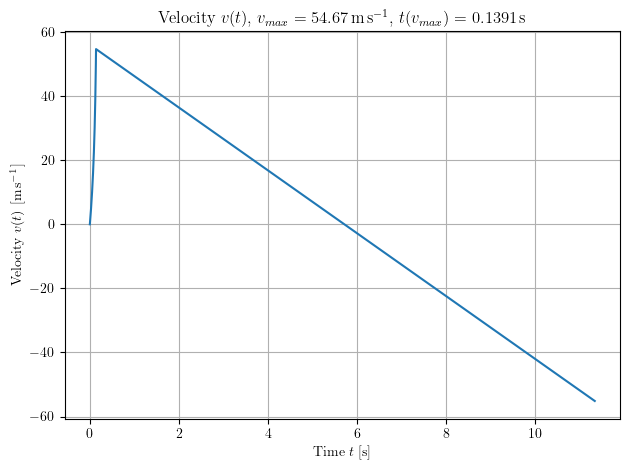

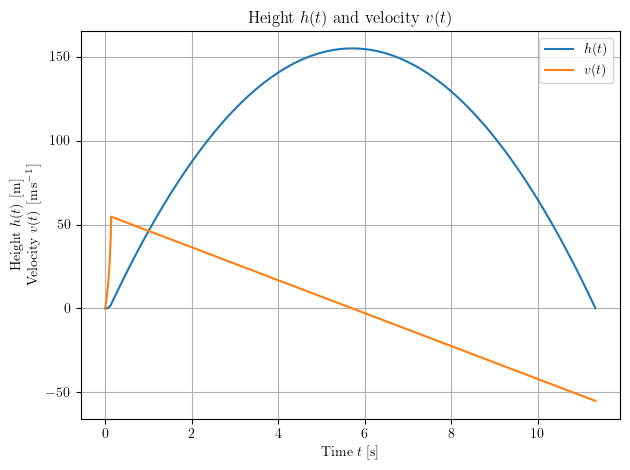

In [6]:
# Create time array
t = np.linspace(0, 15, 100000)

# Calculate results for height
h_t, t_h_max, h_max = h(t)

# Calculate results for velocity
v_t, t_v_max, v_max = v(t)

# Cut h_t, v_t and t arrays to suitable length
idx_h_neg = np.where(h_t < 0)
idx_trunc_after = int(np.min(idx_h_neg))
h_t = h_t[:idx_trunc_after]
v_t = v_t[:idx_trunc_after]
t = t[:idx_trunc_after]

# Plot results
plt.title('Height $h(t)$, $h_{max} = \\SI{%s}{\meter}$, $t(h_{max}) = \\SI{%s}{\second}$' %(h_max, t_h_max))
plt.plot(t, h_t, label='$h(t)$')
plt.xlabel('Time $t$ $[\\si{\second}]$')
plt.ylabel('Height $h(t)$ $[\\si{\meter}]$')
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/h(t)_without_drag.pdf')
plt.show()

plt.title('Velocity $v(t)$, $v_{max} = \\SI{%s}{\meter\per\second}$, $t(v_{max}) = \\SI{%s}{\second}$' %(v_max, t_v_max))
plt.plot(t, v_t, label='$v(t)$')
plt.xlabel('Time $t$ $[\\si{\second}]$')
plt.ylabel('Velocity $v(t)$ $[\\si{\meter\per\second}]$')
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/v(t)_without_drag.pdf')
plt.show()

plt.title('Height $h(t)$ and velocity $v(t)$')
plt.plot(t, h_t, label='$h(t)$')
plt.plot(t, v_t, label='$v(t)$')
plt.xlabel('Time $t$ $[\\si{\second}]$')
plt.ylabel('Height $h(t)$ $[\\si{\meter}]$\nVelocity $v(t)$ $[\\si{\meter\per\second}]$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('figures/h(t)_v(t)_without_drag.pdf')
plt.show()